In [112]:
# Libraries:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [113]:
# Config:
# In order to display all the columns:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 10

### Importing datasets:

In [114]:
# Training set:
filepath="../dataset/train.csv" 
data=pd.read_csv(filepath)
# Training set:
filepath_val="../dataset/validation.csv"
data_val=pd.read_csv(filepath_val)

# Testing set:
filepath_test="../dataset/test.csv"
data_test=pd.read_csv(filepath_test)

In [115]:
# Functions for analysing data:
def print_different_values(dataframe):
    print "total number of datapoints : "+str(len(dataframe))
    for i in dataframe.columns:
        set_col=len(dataframe[i].value_counts())
        print "%s has %d different points." %(i,set_col)

In [116]:
# Ploting:

# Groupby functions:
def plot_ctr(dataframe,y,x,list_advert_tot):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(9,9))
    for list_advert in list_advert_tot:
        mean_data=data.groupby([x,adv]).mean()
        ts_mean=mean_data.unstack(adv)[y][list_advert]

        # STD:
        std_data=data.groupby([x,adv]).std()
        ts_std=std_data.unstack(adv)[y][list_advert]

        # Totals:
        totals=data.groupby([x,adv]).count()
        ts_totals=totals.unstack(adv)[y][list_advert]

        # margin:
        margin=ts_std*2/np.sqrt(ts_totals)
        plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin,fmt='--o')
    plt.legend(list_advert_tot, loc=0)
    plt.ylabel(y)
    plt.xlabel(x)

In [117]:
# Analising:
print len(data.columns)
data.head()

26


,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,2,trqRTuToMTNUjM9r5rMi,d48a96ab59d7ad741a48e781de44efeb,null,433287550,468,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,2,trqRTv14MqTR1m58uG,313e110c149d24b3236165d30879c595,null,2264242698,250,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,1,trqRTJTxX5scg4,845b72208c27b993daa11c8104449e22,null,mm_40135906_3486753_11388735,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,2,trqRTuMvjTN7X9KbuKz,ea6709db2703ae8698755629f1f9df32,null,2536830969,728,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,1,trqRTu1YP5scFsf,b7b8e74eefbdd5cc1a9f0acb2e5c0d6c,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [118]:
# Number of different values for each column:
print_different_values(data)

total number of datapoints : 2697738
click has 2 different points.
weekday has 7 different points.
hour has 24 different points.
bidid has 2697738 different points.
logtype has 1 different points.
userid has 2591064 different points.
useragent has 39 different points.
IP has 515530 different points.
region has 35 different points.
city has 370 different points.
adexchange has 5 different points.
domain has 24087 different points.
url has 833453 different points.
urlid has 1 different points.
slotid has 55983 different points.
slotwidth has 21 different points.
slotheight has 14 different points.
slotvisibility has 11 different points.
slotformat has 4 different points.
slotprice has 284 different points.
creative has 130 different points.
bidprice has 8 different points.
payprice has 301 different points.
keypage has 19 different points.
advertiser has 9 different points.
usertag has 814364 different points.


In [119]:
# Basic Analysis:
# Num click:
num_clics=len(data[data.click==1])
print "num_clics: %d"%num_clics
# number of impressions:
num_impressions=len(data)
print "num_clics: %d"%num_impressions
# Click through Rate: number of Clicks / number ofImpressions
CTR=num_clics/num_impressions
print "CTR: {:.4%}".format(CTR)   # Showing in percentage!

num_clics: 2034
num_clics: 2697738
CTR: 0.0754%


### After checkin the paper of ipinYou got some insights:
#### Some Columns description:
- logtype: 1 for impression, repeated
- useragent: device/OS/browser
- adexchange: 1 to 4 id of the "auction house"
- urlid: null if is anonymous, in this case they all are
- slotvisitility: first view means that it appears without the user having to scroll down
- bidprice: the "optimal" bid price 
- payprice: highest bid price from competitors, also called "market price" or "auction winning price"
- advertiser: Corresponds ti a different categorie of the advertiser, this could be: "telecom", "Oil", etc

#### Some conclusion:
- All the rows represent impressions (showing the ad after winnign the auction) for which the biding price was higher that the payprice and also higher that the other competitors

In [125]:
data

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,2,trqRTuToMTNUjM9r5rMi,d48a96ab59d7ad741a48e781de44efeb,null,433287550,468,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,2,trqRTv14MqTR1m58uG,313e110c149d24b3236165d30879c595,null,2264242698,250,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,1,trqRTJTxX5scg4,845b72208c27b993daa11c8104449e22,null,mm_40135906_3486753_11388735,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,2,trqRTuMvjTN7X9KbuKz,ea6709db2703ae8698755629f1f9df32,null,2536830969,728,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,1,trqRTu1YP5scFsf,b7b8e74eefbdd5cc1a9f0acb2e5c0d6c,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697733,0,2,17,a7949139c6ac6b857d22dbd098bbff23,1,u_Vh1DCeT0DqEyJOj,windows_ie,123.191.94.*,40,41,3,3FKElpuEMusyJqKbuKz,47efa581d3a4794462180033ccfb665e,null,ALLINONE_F_Width1,1000,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,"10063,10059,10111"
2697734,0,3,15,28d5ba2b59911217d93c99969053172e,1,u_VhTdLe1dPob9jmB,windows_chrome,112.90.239.*,216,231,2,trqRTuMvjTN7X9KbuKz,a34bc2566f109ffe9d53caf70c14c1df,null,127598132,728,90,0,0,133,7184c9560e68e977187e67e45a4f3198,238,149,0f951a030abdaedd733ee8d114ce2944,3427,"13800,10024,10057"
2697735,0,2,0,42c67d24b0adb9f269e365d4ec76f7e0,1,u_VhCEL3qtL2j9DVf,windows_ie,123.88.195.*,216,217,2,trqRTuToMTNUjM9r5rMi,244736a27116e1cd77539487e5946b46,null,979051993,250,250,2,0,5,8dff45ed862a740986dbe688aafee7e5,249,77,15b749127478946f161a54dc0dad27c8,3476,"10057,10063,13866,10006,10110"
2697736,0,0,19,9792657ec784429e5720a2e1dbd496f4,1,u_VhdALuRIP9FOjBB,windows_other,112.228.125.*,146,159,3,31xSTvprdN1RFt,c0b9301e7ce233ab7edd7a6835e9738c,null,Ent_F_bottom_Width,1000,90,0,0,20,d01411218cc79bc49d2a4078c4093b76,241,95,b2e35064f3549d447edbbdfb1f707c8c,3427,"10006,10063,10059,10110"


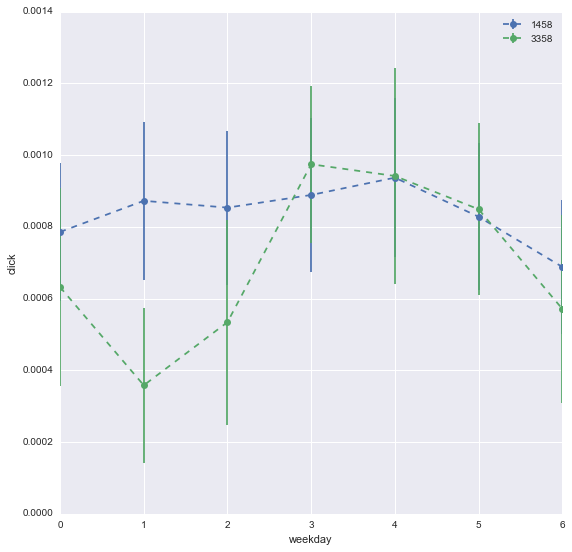

In [130]:
# Plotting 
x= "weekday"
y="click"
list_advert=[1458,3358]
adv="advertiser"
plot_ctr(data,y,x,list_advert)

In [ ]:
# Next: Plotting all the other values